# Análisis Exploratorio de Datos


## Importacion de librerias


In [1]:
import os
import numpy as np
import pandas as pd


## Cargar datos


In [2]:
data = pd.read_csv("data.csv")
print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

- genre: Género musical de la canción.
- artist_name: Nombre del artista.
- track_name: Nombre de la canción.
- track_id: Identificador único de la canción.
- popularity: Popularidad de la canción (valor numérico).
- acousticness: Medida de cuán acústica es la canción.
- danceability: Facilidad para bailar la canción.
- duration_ms: Duración de la canción en milisegundos.
- energy: Nivel de energía de la canción.
- instrumentalness: Probabilidad de que la canción sea instrumental.
- key: Tono musical de la canción.
- liveness: Presencia de público en la grabación.
- loudness: Volumen general de la canción (en decibelios).
- mode: Modo musical (mayor o menor).
- speechiness: Presencia de palabras habladas en la canción.
- tempo: Tempo de la canción (en BPM).
- time_signature: Compás de la canción.
- valence: Medida de positividad o felicidad transmitida por la canción.


## Limpieza de datos


In [3]:
# Eliminar filas con valores nulos en el DataFrame
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

### Estadisticas


In [4]:
# Mostrar estadísticas descriptivas para las variables numéricas
display(data.describe())

# Mostrar estadísticas para variables categóricas
display(data.describe(include=['object']))

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


,artists,id,name,release_date
count,170653,170653,170653,170653
unique,34088,170653,133638,11244
top,['Эрнест Хемингуэй'],4BJqT0PrAfrxzMOxytFOIz,White Christmas,1945
freq,1211,1,73,1446


## Visualización


### Correlación

Gráfico de la correlación de Pearson de cada variable respecto a la popularidad


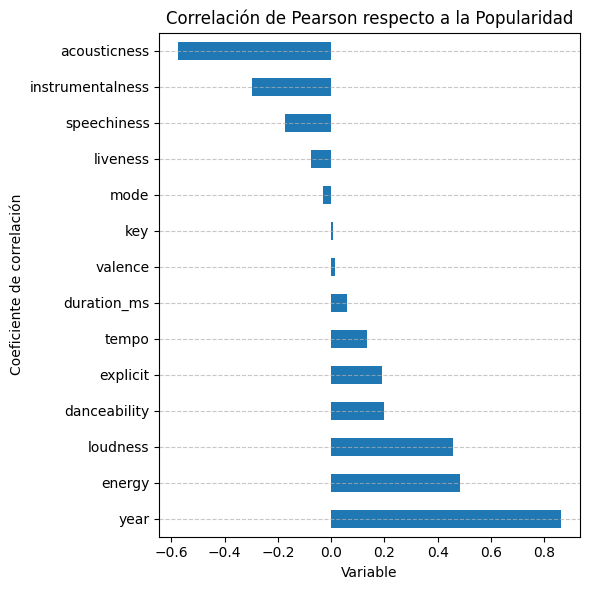

In [5]:
import matplotlib.pyplot as plt

# Calcular la correlación de Pearson de cada variable numérica respecto a 'popularity'
correlations = data.corr(numeric_only=True)['popularity'].sort_values(ascending=False)

# Excluir la autocorrelación
correlations = correlations.drop('popularity')

# Graficar las correlaciones
plt.figure(figsize=(6, 6))
correlations.plot(kind='barh')
plt.title('Correlación de Pearson respecto a la Popularidad')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cantidad de canciones por década


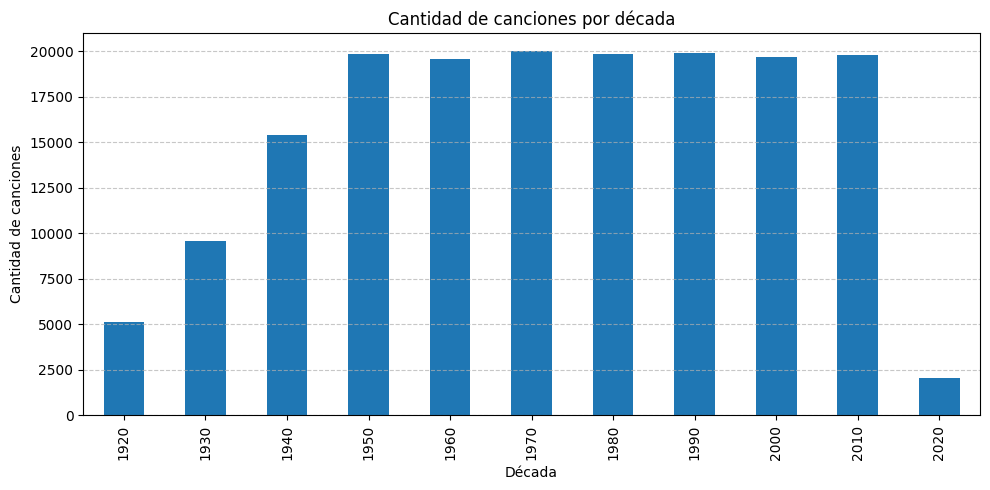

In [6]:
# Extraer el año desde el track_id si está codificado, pero normalmente no lo está.
# Si hay una columna de año, úsala. Si no, intentemos extraer el año del nombre de la canción o artista (no recomendado).
# Supongamos que hay una columna 'year' (si no, esto dará error y se debe ajustar según los datos reales).

if 'year' in data.columns:
    canciones_por_anio = data['year'].value_counts().sort_index()
    
    # Agrupar la cantidad de canciones por década
    decadas = (canciones_por_anio.index // 10) * 10
    canciones_por_decada = canciones_por_anio.groupby(decadas).sum()

    plt.figure(figsize=(10, 5))
    canciones_por_decada.plot(kind='bar')
    plt.title('Cantidad de canciones por década')
    plt.xlabel('Década')
    plt.ylabel('Cantidad de canciones')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No existe una columna 'year' en el DataFrame.")

In [8]:
# Graficar el promedio de varias características de sonido por año
import plotly.express as px
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
if 'year' in data.columns:
    df_avg = data.groupby('year')[sound_features].mean().reset_index()
    fig = px.line(
        df_avg,
        x='year',
        y=sound_features,
        markers=True,
        width=1000,
        height=600,
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    fig.update_layout(
        title='Promedio de características de sonido por año',
        xaxis_title='Año',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'year' en el DataFrame.")

In [12]:
# Mostrar los 10 géneros más populares y sus características promedio
# Mostrar los 10 géneros más populares y sus características promedio
import plotly.express as px

data_by_genres = pd.read_csv("data_by_genres.csv")

if 'genres' in data_by_genres.columns:
    # Agrupar por género y calcular el promedio de las características relevantes
    genre_data = data_by_genres.groupby('genres')[['popularity', 'valence', 'energy', 'danceability', 'acousticness']].mean().reset_index()
    # Seleccionar los 10 géneros con mayor popularidad promedio
    top10_genres = genre_data.nlargest(10, 'popularity')
    # Graficar las características promedio de los 10 géneros más populares
    fig = px.bar(
        top10_genres,
        x='genres',
        y=['valence', 'energy', 'danceability', 'acousticness'],
        barmode='group',
        title='Top 10 géneros más populares y sus características promedio'
    )
    fig.update_layout(
        xaxis_title='Género',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'genres'")